David Laub A13026162  
Section A00, Team 12, Lab 3

# Plate Heat Exchanger Pre-Lab
Suppose a plate heat exchanger has a total of nine plates. Each plate is 30 cm wide, 10 cm tall, and the separation between plates is 1 cm. The total flow of hot water is $1\ \text{L}\ \text{s}^{-1}$, and the total flow of cold water is $2\ \text{L}\ \text{s}^{-1}$.
1. Provide a formula to calculate the heat capacity $C_p$ of liquid water at any temperature from 20 $^\circ$C to 80 $^\circ$C (hint: the NIST Thermophysical Properties of Fluid Systems database is extensive, and you could fit a polynomial equation to the data provided).
2. Repeat the previous question for density $\rho$, thermal conductivity k, and viscosity $\mu$.
3. Use the formulae from the previous two problems to calculate the Prandtl number Pr of water at 55 $^\circ$C.
4. If there are equal numbers of hot and cold fluid channels, how many channels of hot and cold are there?
5. What is the total area available for heat transfer?
6. What is the Reynolds number inside one of the cold channels? Evaluate fluid properties at 35 $^\circ$C, the average of the cold stream inlet and outlet temperatures.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

### Getting NIST data

Assumed the plate heat exchanger operates isobarically at or near 1 atm.  
Units:
- Temperature ($^\circ \text{C}$)
- Density ($\text{kg}/\text{m}^{-3}$)
- Cp ($\text{J}/\text{g}\cdot \text{K}$)
- Viscosity ($\text{Pa}\cdot \text{s}$)
- Therm. Cond. ($\text{W}/\text{m}\cdot \text{K}$)

In [2]:
df = pd.read_csv('NIST Water Data.txt', sep='\t')
to_drop = ['Pressure (atm)',
           'Volume (m3/kg)',
           'Internal Energy (kJ/kg)',
           'Enthalpy (kJ/kg)',
           'Entropy (J/g*K)',
           'Cv (J/g*K)',
           'Sound Spd. (m/s)',
           'Joule-Thomson (F/atm)',
           'Phase'
          ]
df.drop(columns=to_drop, inplace=True)
new_labels = {'Temperature (C)': 'T',
              'Density (kg/m3)': 'rho',
              'Cp (J/g*K)': 'Cp',
              'Viscosity (Pa*s)': 'mu',
              'Therm. Cond. (W/m*K)': 'k'
             }
df.rename(columns=new_labels, inplace=True)
df.head()

,T,rho,Cp,mu,k
0,20.0,998.21,4.1841,0.001002,0.59846
1,20.1,998.19,4.1840,0.000999,0.59864
2,20.2,998.17,4.1839,0.000997,0.59882
3,20.3,998.14,4.1838,0.000994,0.59900
4,20.4,998.12,4.1838,0.000992,0.59917


### Getting polynomial correlations for $C_p$, $\rho$, $k$, and $\mu$
Computed for a minimum $r^2$ of 0.999

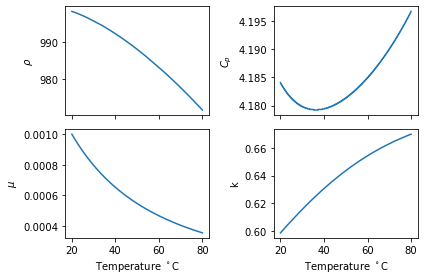

In [3]:
fig, ax = plt.subplots(2, 2, sharex=True)
ax[0, 0].plot('T', 'rho', data=df)
ax[0, 1].plot('T', 'Cp', data=df)
ax[1, 0].plot('T', 'mu', data=df)
ax[1, 1].plot('T', 'k', '', data=df)

ax[0, 0].set(ylabel='$\\rho$')
ax[0, 1].set(ylabel='$C_p$')
ax[1, 0].set(xlabel='Temperature $^\circ$C', ylabel='$\mu$')
ax[1, 1].set(xlabel='Temperature $^\circ$C', ylabel='k')

fig.tight_layout()
plt.show()

From these plots, a polynomial fit seems appropriate.

In [4]:
rho, dnostic = poly.Polynomial.fit(df['T'], df['rho'], 2, full=True)
SSres = dnostic[0]
SStot = np.sum((df['rho']-df['rho'].mean())**2)
r2 = 1 - SSres/SStot
print(r2)
print(rho)

[0.99994875]
poly([988.04244564 -13.35569002  -3.02396254])


In [5]:
Cp, dnostic = poly.Polynomial.fit(df['T'], df['Cp'], 3, full=True)
SSres = dnostic[0]
SStot = np.sum((df['Cp']-df['Cp'].mean())**2)
r2 = 1 - SSres/SStot
print(r2)
print(Cp)

[0.99924893]
poly([ 4.18119695e+00  8.62859272e-03  8.80708732e-03 -2.19996557e-03])


In [6]:
mu, dnostic = poly.Polynomial.fit(df['T'], df['mu'], 3, full=True)
SSres = dnostic[0]
SStot = np.sum((df['mu']-df['mu'].mean())**2)
r2 = 1 - SSres/SStot
print(r2)
print(mu)

[0.99993844]
poly([ 5.45336315e-04 -2.73590520e-04  1.28390407e-04 -4.91994709e-05])


In [7]:
k, dnostic = poly.Polynomial.fit(df['T'], df['k'], 2, full=True)
SSres = dnostic[0]
SStot = np.sum((df['k']-df['k'].mean())**2)
r2 = 1 - SSres/SStot
print(r2)
print(k)

[0.99999535]
poly([ 0.64355239  0.03573395 -0.00942611])


### 1, 2. Correlations for $C_p$, $\rho$, $k$, and $\mu$
$\rho(T) = 988.04244564 - 13.35569002T - 3.02396254T^2$

$C_p(T) = 4.18119695 + 8.62859272\times 10^{-3}T + 8.80708732e\times 10^{-3}T^2 - 2.19996557\times 10^{-3}T^3$

$\mu(T) = 5.45336315e-04 - 2.73590520\times 10^{-4}T + 1.28390407\times 10^{-4}T^2 - 4.91994709\times 10^{-5}T^3$

$k(T) = 0.64355239 + 0.03573395T - 0.00942611T^2$

### Getting Prandtl number at 55 $^\circ$C
$$ \text{Pr} = \frac{C_p\mu}{k} $$

In [8]:
Pr = Cp(55)*mu(55)/k(55)
print(Pr)

0.003241148555031628


### 3. Prandtl number at 55 $^\circ$C
$ \text{Pr}_{55} = 3.2411\times 10^{-3}$

### 4. Hot and cold fluid channels
There are 9 plates, so 10 channels total. There are 5 channels of hot and cold fluid each.

### 5. Total area for heat transfer
With 10 channels, there are 9 interfaces between hot and cold in the HEX. Each plate has $ 0.3 \cdot 0.1 = 0.03\ \text{m}^2$ of surface area. With 9 interfaces, this means there is $0.27\ \text{m}^2$ of total surface area available for heat transfer.

### Getting Reynolds number at 35 $^\circ$C
$$ \text{Re} = \frac{\rho uL}{\mu} $$

Will need:
1. The flow velocity $u$ from volumetric flow $\dot{V}$ $$ u = \frac{\dot{V}}{A} $$ where A is the cross-sectional area of a channel.

2. The characteristic length L for a rectangular channel $$ L = \frac{4A}{P} $$ where A is the cross-sectional area and P is the perimeter.

In [9]:
V_cold = 2*10**-3
A = 0.3*0.01
P = 2*.3+2*.01

u_cold = V_cold/A
L = 4*A/P
Re = rho(35)*u_cold*L/mu(35)

print(Re)

17803.605924469335


### 6. Reynolds number at 35 $^\circ$C
$ \text{Re}_{35} = 17,804$